<a href="https://colab.research.google.com/github/vZekii/MachineLearningAssignment2/blob/main/Machine_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task - Multi-Classs Perceptron Implementation and Hyperparameter Optimsation

For this assignment, I have chosen to select option 1, and implement a Multi-class perceptron, as well as look into the optimisation of the hyperparameters involved in the algorithm.



I have asked chat gpt to generate some initial code for this task. I have since double checked and touched up the code where it was incorrect or necessary. I have also opted to organise it in a better fashion.

1. Import Required Libraries:
Start by importing the necessary libraries, including scikit-learn to load the Iris dataset and NumPy for numerical operations. Matplotlib is also included for graphical representations

In [ ]:
import time
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2. Load and Prepare the Iris Dataset:
Load the Iris dataset and split it into training and testing sets. The breast cancer dataset can also be loaded here if desired.

In [ ]:
# Load the data, and split it into the data and target sets
iris = datasets.load_iris()
# iris = datasets.load_breast_cancer()
X = iris.data
y = iris.target

# Split the data further into a training and testing group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


3. Implement the Multi-Class Perceptron:
Create a class for the multi-class perceptron. The perceptron will have weights and biases for each class. This class includes both the maxarg and softmax prediction in it's predict function. It also has 2 built in training methods; one for regular sequential (Perceptron training rule) training, and another for batch training.

In [ ]:
class MultiClassPerceptron:
    def __init__(self, num_classes, num_features, learning_rate=0.1, num_epochs=100):
        self.num_classes = num_classes  # amount of classes in the dataset
        self.num_features = num_features  # amount of features in the dataset
        self.learning_rate = learning_rate  # learning rate hyperparameter
        self.num_epochs = num_epochs  # num epochs hyperparameter
        self.weights = np.zeros((num_classes, num_features))  # a matrix representing the weights for each feature
        self.biases = np.zeros(num_classes)  # vector representing the biases for each class

    def predict(self, x, softmax=False):
      """
      x: Input values to predict from
      softmax: Boolean whether to use the softmax algorithm or not
      """
      scores = np.dot(self.weights, x) + self.biases  # Calculate the scores
      if softmax:
        # Apply the softmax function to compute class probabilities
        exp_scores = np.exp(scores - np.max(scores))  # Subtracting max score for numerical stability
        class_probs = exp_scores / exp_scores.sum()  # divide it by the overall score
        return class_probs
      else:
        # return the highest score without calculating the class probabilities
        return np.argmax(scores)

    def train(self, X, y):
      """
      A standard implementation of the sequential perceptron learning rule
      algorithm, which works by looking at each datapoint sequentially, and
      adjusting the weights and bias per data point.

      """
      for epoch in range(self.num_epochs):
          for i in range(len(X)):
              x = X[i]
              y_true = y[i]

              y_pred = self.predict(x)
              if y_pred != y_true:
                  self.weights[y_true] += self.learning_rate * x
                  self.biases[y_true] += self.learning_rate
                  self.weights[y_pred] -= self.learning_rate * x
                  self.biases[y_pred] -= self.learning_rate

    def train_batch(self, X, y):
      """
      An implementation of a simple batch training algorithm. It requires for
      the inputted data to already be in "batch" form, and collects aggregate
      weight and bias updates throughout the batch, performing an update once
      the batch has been processed by the training algorithm.
      """
      for epoch in range(self.num_epochs):
          # Initialize updates for weights and biases
          weight_updates = np.zeros(self.weights.shape)
          bias_updates = np.zeros(self.biases.shape)

          for i in range(len(X)):
              x = X[i]
              y_true = y[i]

              y_pred = self.predict(x)
              if y_pred != y_true:
                  weight_updates[y_true] += x
                  bias_updates[y_true] += 1
                  weight_updates[y_pred] -= x
                  bias_updates[y_pred] -= 1

          # Update weights and biases with accumulated updates
          self.weights += self.learning_rate * weight_updates
          self.biases += self.learning_rate * bias_updates

3.5. Define the evaluation function, which will determine and collect information based on the hyperparameters provided.

In [ ]:
def train_and_evaluate(learning_rate, num_epochs, batch_size):
    """
    An algorithm to test the various hyperparameters, by creating a new perceptron
    each iteration with the inputted parameters, and then performing the training
    and prediction tasks to gather the accuracy, training time, stability, and
    the number of losses encountered.
    """

    # Collect the number of classes and features of the set, and initialise a perceptron
    num_classes = len(np.unique(y_train))
    num_features = X_train.shape[1]
    perceptron = MultiClassPerceptron(num_classes, num_features, learning_rate, num_epochs)

    # Store the start time and initialise a list for the training loss amounts
    start_time = time.time()
    training_losses = []

    # Begin the batch training, depending on the number of epochs, and the batch size
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            perceptron.train_batch(X_batch, y_batch)

        # Calculate the training loss for this epoch
        epoch_loss = 0
        for i in range(len(X_train)):
            x = X_train[i]
            y_true = y_train[i]
            y_pred = perceptron.predict(x)
            if y_pred != y_true:
                epoch_loss += 1
        training_losses.append(epoch_loss / len(X_train))


    # Calculate the training time and the overall stability
    training_time = time.time() - start_time
    stability = np.std(training_losses)

    # Check the accuracy of the model
    correct = 0
    for i in range(len(X_test)):
        if perceptron.predict(X_test[i]) == y_test[i]:
            correct += 1
    accuracy = correct / len(X_test)

    # Return the gathered information
    return accuracy, training_time, stability, training_losses


4. Test the algorithm with a single run though, either using the sequential or batch training method. There are also examples of the softmax function being used here.

In [ ]:
# Initialise the perceptron with the default parameters
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
perceptron = MultiClassPerceptron(num_classes, num_features)

# Select whether to use batch training or not
batch_train = True

if not batch_train:
  # Use standard single-updating method
  perceptron.train(X_train, y_train)

  # Make predictions using softmax
  sample_to_predict = X_test[0]
  predicted_probabilities = perceptron.predict(sample_to_predict, softmax=True)
  print("Predicted Class Probabilities:", predicted_probabilities)

else:
  # Split the data into batches and train the perceptron
  batch_size = 10  # Adjust the batch size as needed
  num_epochs = 100

  for epoch in range(num_epochs):
      for i in range(0, len(X_train), batch_size):
          X_batch = X_train[i:i+batch_size]
          y_batch = y_train[i:i+batch_size]

          perceptron.train_batch(X_batch, y_batch)


# Check the accuracy based on the training method
correct = 0
for i in range(len(X_test)):
    if perceptron.predict(X_test[i]) == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.33%


5. Run the Hyperparameter optimisation code. The inputs are the dataset selected earlier, as well as the learning rates, epochs, and batch sizes to use. Outputs are the best selection of hyperparameters; and if there are ties, the first iteration with that accuracy will be shown.

lr=0.1, batch=5, epochs=50, accuracy=0.9833%, stability=0.01872, time=1.36s
lr=0.1, batch=5, epochs=100, accuracy=0.9833%, stability=0.01825, time=5.21s
lr=0.1, batch=5, epochs=200, accuracy=0.9833%, stability=0.01517, time=22.42s
lr=0.1, batch=10, epochs=50, accuracy=0.9833%, stability=0.01237, time=1.20s
lr=0.1, batch=10, epochs=100, accuracy=0.9833%, stability=0.01065, time=5.49s
lr=0.1, batch=10, epochs=200, accuracy=0.9833%, stability=0.01042, time=19.72s
lr=0.1, batch=32, epochs=50, accuracy=0.9833%, stability=0.01168, time=1.84s
lr=0.1, batch=32, epochs=100, accuracy=0.9667%, stability=0.01391, time=4.37s
lr=0.1, batch=32, epochs=200, accuracy=0.9833%, stability=0.01463, time=18.89s
lr=0.1, batch=64, epochs=50, accuracy=0.9667%, stability=0.01430, time=1.14s
lr=0.1, batch=64, epochs=100, accuracy=0.9833%, stability=0.01379, time=4.39s
lr=0.1, batch=64, epochs=200, accuracy=0.9833%, stability=0.01205, time=19.11s
lr=0.01, batch=5, epochs=50, accuracy=0.9833%, stability=0.01872, t

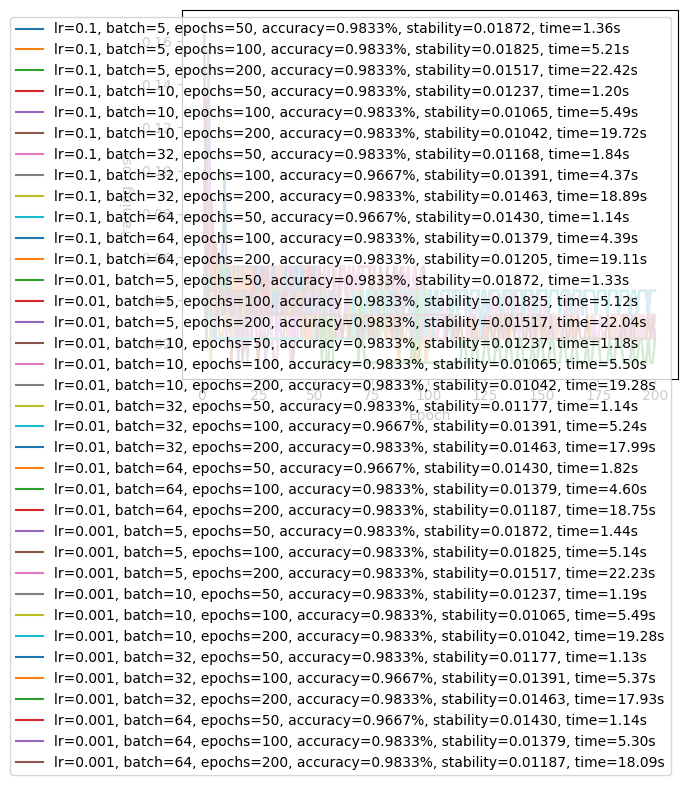

In [ ]:
# Collect the start time for the overall batch training process
start_time = time.time()

# Initialise the different parameters to test
learning_rates = [0.1, 0.01, 0.001]
num_epochs_list = [50, 100, 200]
batch_sizes = [5, 10, 32, 64]

# learning_rates = [0.1]
# num_epochs_list = [50]
# batch_sizes = [10]

# Initialise our "best parameter" storage variables.
best_accuracy = 0
best_hyperparameters = {}
best_stability = float('inf')
best_training_time = float('inf')

# Test all the different combinations of the parameters
for lr in learning_rates:
  for batch_size in batch_sizes:
      for num_epochs in num_epochs_list:
          # collect the results from the parameters given
          accuracy, training_time, stability, training_losses = train_and_evaluate(lr, num_epochs, batch_size)

          # update the best if accuracy is higher or stability is less
          if accuracy >= best_accuracy and stability <= best_stability:
              best_accuracy = accuracy
              best_hyperparameters = {'learning_rate': lr, 'batch_size': batch_size, 'num_epochs': num_epochs}
              best_stability = stability
              best_training_time = training_time

          # Plot training loss over epochs to check for stability
          label = f'lr={lr}, batch={batch_size}, epochs={num_epochs}, accuracy={accuracy:.4f}%, stability={stability:.5f}, time={training_time:.2f}s'
          plt.plot(range(1, num_epochs + 1), training_losses, label=label)
          plt.xlabel('Epoch')
          plt.ylabel('Training Loss')
          plt.legend()
          print(label)

# Print the overall best parameters
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Stability: {best_stability:.5f}")
print(f"Best Training Time: {best_training_time:.2f} seconds")
print(f"Overall Training Time: {time.time() - start_time}")
plt.show()